# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import bokeh.plotting as bkp
#from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Igor\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


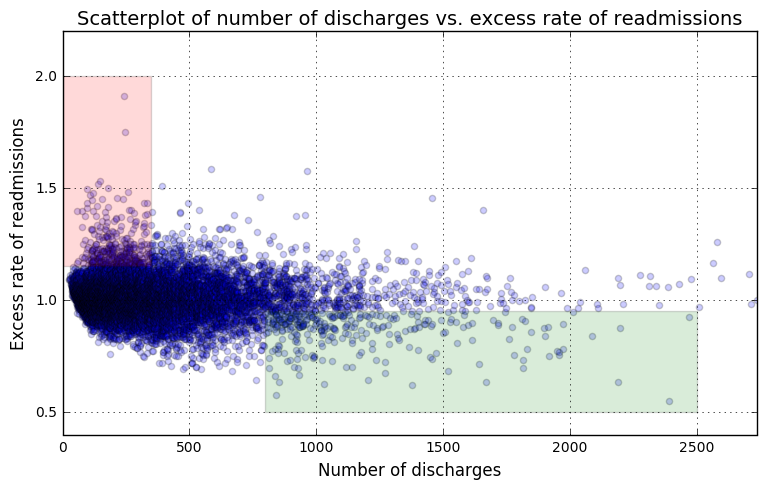

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

### Exercise

Include your work on the following in this notebook and submit to your Github account.

A. Do you agree with the above analysis and recommendations? Why or why not?

B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

1) Setup an appropriate hypothesis test

2) Compute and report the observed significance value (or p-value)

3) Report statistical significance for α = .01

4) Discuss statistical significance and practical significance.Do they differ here? How does this change your recommendation to the client?

5) Look at the scatterplot above.

- What are the advantages and disadvantages of using this plot to convey information?

- Construct another plot that conveys the same information in a more direct manner.


## Analysis

Statistical analysis is not presented in the preliminary report. The difference in excess readmission rates between groups of hospitals/facilities with different number of discharges needs to be statistically proved.

In [6]:
import scipy.stats as stats
import inspect
import seaborn as sns

In [7]:
clean_hospital_read_df.head(1)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [8]:
# Splitting hospitals into groups based on the number of discharges (less then 100, more then 1000, between 100 and 1000)
# Creating data frames for each of the groups
df = clean_hospital_read_df[(clean_hospital_read_df['Excess Readmission Ratio'].notnull())]
df_low = df[df['Number of Discharges'] <= 100]
df_mid = df[(df['Number of Discharges'] <= 1000) & (df['Number of Discharges'] > 100)]
df_high = df[df['Number of Discharges'] > 1000]

In [9]:
# creating lists from the group data frames
low = sorted(df_low['Excess Readmission Ratio'])
mid = sorted(df_mid['Excess Readmission Ratio'])
high = sorted(df_high['Excess Readmission Ratio'])

In [10]:
# Creating a function to get name of a variable / list
def retrieve_name(var):
    """
    Gets the name of variable - does it from the out most frame inner-wards
    :param var: variable to get name from
    :return: string
    """
    for fi in reversed(inspect.stack()):
        names = [var_name for var_name, var_val in fi.frame.f_locals.items() if var_val is var]
        if len(names) > 0:
            return names[0]

In [11]:
# Creating a function to get statistic 
def statdesc (*args):
    """
    Gets statistic
    :param args: one (or more) pandas series, list, or numpy array
    :return: print the object name and statistic
    """
    for i in args:
        name = retrieve_name(i)
        n = len(i)
        mean = np.mean(i)
        std = np.std(i)
        sem = stats.sem(i)
        skewness = stats.skew(i)
        print('Group name: ', name)
        print('n: ', n)
        print('mean: ', mean)
        print('std: ', std)
        print('skewness: ', skewness)
        print('----------------------------------')

In [12]:
# Getting statistics for the groups of hospitals with different discharge rates
statdesc(low, mid, high)

Group name:  low
n:  1223
mean:  1.02208838921
std:  0.0581306769012
skewness:  2.02830763302295
----------------------------------
Group name:  mid
n:  9811
mean:  1.00706223627
std:  0.0935076494486
skewness:  0.6799322289674956
----------------------------------
Group name:  high
n:  463
mean:  0.978335421166
std:  0.119877685856
skewness:  -0.27334367235867707
----------------------------------


In [13]:
# Creating a function to calculate confidence intervals
def ConfInt(*args, level):
    """
    Determines confidence intervals
    :param args: one (or more pandas) series, list, or numpy array; level: confidence level
    :return: confidence intervals
    """
    for i in args:
        name = retrieve_name(i)
        int1, int2 = stats.norm.interval(level, loc=np.mean(i), scale=stats.sem(i))
        print('Group name: ', name)
        print(int1, '-', int2)
        print('-----------------------------------------')

In [14]:
# Determining 99% confidence intervals of excess readmission ratio for the hospital groups
ConfInt(low, mid, high, level=0.99)

Group name:  low
1.01780500672 - 1.02637177169
-----------------------------------------
Group name:  mid
1.00463042584 - 1.00949404669
-----------------------------------------
Group name:  high
0.963969468127 - 0.992701374206
-----------------------------------------


In [15]:
# One-way Anova
# computing the f test statistic and p value for the three groups
f_val, p_val = stats.f_oneway(low, high, mid)
print('f value: ', f_val)
print('p value: ', p_val)

f value:  39.037661261
p value:  1.26905631092e-17


In [16]:
# Kruskal-Wallis H-test for independent samples 
# computing the h test statistic and p value for the three groups
h_val, p_val = stats.kruskal(low, high, mid)
print('h value: ', h_val)
print('p value: ', p_val)

h value:  82.2831002519
p value:  1.35659997073e-18


In [17]:
# Creating a function to plot probability distribution
def plot_pdf(*args):
    """
    Plots probability distribution
    :param args: one (or more pandas) series, list, or numpy array
    :return: plot
    """
    colors = ['red', 'green', 'blue', 'COLOR4', 'COLOR5']
    ncolor = 0
    for i in args:
        name = retrieve_name(i)
        pdf = stats.norm.pdf(i, np.mean(i), np.std(i))
        plt_fit = plt.plot(i, pdf, linewidth=2, label=name, color=colors[ncolor])
        ncolor += 1
    plt_label = plt.xlabel('Excess Readmission Ratio')
    plt_legend = plt.legend(loc=2)

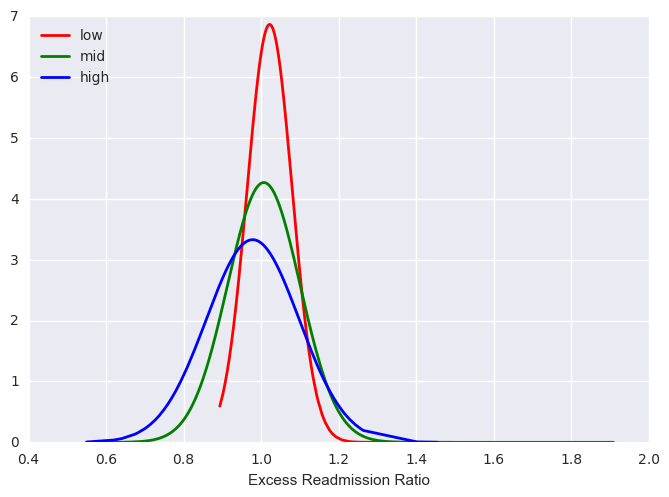

In [18]:
# Plotting probability distribution of excess readmission ratio for the hospital groups
plot_pdf(low, mid, high)

### Conclusion: 

With p-values significantly smaller than 0.01, the difference in mean excess readmission ratios among low, mid, and high-discharge hospitals is significant. This suggests a correlation between excess readmission ratio and the number of discharges.

Seaborn plot showing correlation between excess readmission rate and number of discharges is believed to be a better presentation of the finding.

In [40]:
a = clean_hospital_read_df['Number of Discharges'][81:-3]
b = clean_hospital_read_df['Excess Readmission Ratio'][81:-3]

C:\Users\Igor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


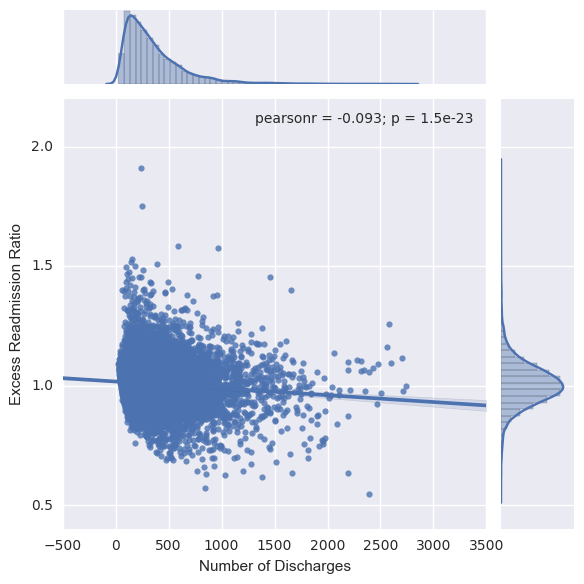

In [48]:
sns.jointplot(x=a, y=b, kind='reg')